In [26]:
import PIL
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib

In [40]:
import torchvision.transforms as T

In [104]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# Load a pre-trained Faster R-CNN model with ResNet-50 backbone and FPN
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None, num_classes = num_classes, progress=True)

# Modify the number of output classes in the model's classification head
num_classes = 9  # Replace with the actual number of classes in your task
in_features = model.roi_heads.box_predictor.cls_score.in_features
# model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_channels, num_classes)



In [105]:
# modal.train()

NameError: name 'modal' is not defined

In [106]:
e = model.eval()

In [107]:
image = Image.open("./Flowers/Babi/babi_100.jpg").convert('RGB')
image = T.Resize((256, 256))(image)
# print(image)
output = model(T.ToTensor()(image).unsqueeze_(0))

18 tensor([ 0,  2,  3,  4,  6, 10, 17, 18, 20, 21, 47, 49, 50, 61, 71, 74, 90, 95])
tensor(14.5036, grad_fn=<MulBackward0>) 17543.035
tensor(14.1721, grad_fn=<MulBackward0>) 58923.168
tensor(14.1260, grad_fn=<MulBackward0>) 10276.365
tensor(14.1230, grad_fn=<MulBackward0>) 7489.928
tensor(14.0640, grad_fn=<MulBackward0>) 6015.284
tensor(13.9784, grad_fn=<MulBackward0>) 53129.47
tensor(13.8504, grad_fn=<MulBackward0>) -76.890396
tensor(13.8430, grad_fn=<MulBackward0>) 6438.878
tensor(13.8055, grad_fn=<MulBackward0>) 9132.157
tensor(13.8001, grad_fn=<MulBackward0>) 6802.507
tensor(13.6781, grad_fn=<MulBackward0>) 26420.996
tensor(13.6646, grad_fn=<MulBackward0>) 19071.516
tensor(13.6455, grad_fn=<MulBackward0>) 4465.3066
tensor(13.5897, grad_fn=<MulBackward0>) 22301.613
tensor(13.5393, grad_fn=<MulBackward0>) 51000.848
tensor(13.5341, grad_fn=<MulBackward0>) 9204.181
tensor(13.4742, grad_fn=<MulBackward0>) 185.85445
tensor(13.4569, grad_fn=<MulBackward0>) 17506.604


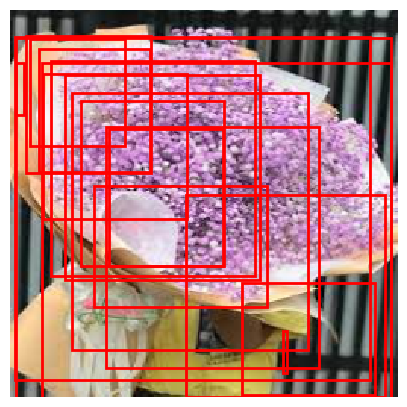

In [109]:
fix, ax = plt.subplots(figsize=(5,6))
ax.axis('off')
ax.matshow(image)
# print(len(output))
for i in output:
    boxes = torchvision.ops.nms(i["boxes"], i["scores"], 0.001)
    print(len(boxes), boxes)
    for j in boxes:
        x1, x2, y1, y2 = i["boxes"][j].detach().cpu().numpy()
        print(i["scores"][j] *100, (y2-y1) * (x2-x1))
        rect = matplotlib.patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    # print(i)
plt.show()